In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from os import path
import itertools
import requests
from bs4 import BeautifulSoup
from matplotlib.ticker import ScalarFormatter, LogFormatter, LogFormatterExponent, \
LogFormatterMathtext
from matplotlib.pyplot import figure, axes, plot, xlabel, ylabel, title, \
grid, savefig, show

In [109]:
word = "peace"
URL = "http://projects.fivethirtyeight.com/reddit-ngram/?keyword={}&start=20071015&end=20150831&smoothing=10"
query = URL.format(word)
r = requests.get(query)
if r.ok:
    text = r.text
else:
    raise Exception("Failed to download the page")
    

In [110]:
soup = BeautifulSoup(text, 'html.parser')

In [111]:
links = soup.find_all(id="download-link")

In [112]:
links.get("href")

AttributeError: 'ResultSet' object has no attribute 'get'

In [113]:
def GetRedditViewerCSV(word):
   URL = "http://projects.fivethirtyeight.com/reddit-ngram/?keyword={}&start=20071015&end=20150831&smoothing=10"
   query = URL.format(word)
   

In [114]:
%matplotlib inline

In [115]:
from tools import FixedOrderFormatter

In [116]:
!ls data/Reddit/

biracial.csv         multicultural.csv    multiracial.csv
interracial.csv      multiculturalism.csv
monocultural.csv     multiethnic.csv


In [117]:
def load_reddit_database():
    df = pd.read_csv("data/Reddit/biracial.csv") 

    for file in glob.glob("data/Reddit/*csv"):
      filename = path.basename(file)
      if filename == "biracial.csv": continue
      new_column = pd.read_csv(file)
      print(filename)
      df = pd.merge(df, new_column, on="date", how="outer")
    df.set_index("date", inplace=True)
    df.set_index(pd.to_datetime(df.index), inplace=True)
    df  = df.resample('M', how='sum')
    return df

In [118]:
reddit = load_reddit_database()

interracial.csv
monocultural.csv
multicultural.csv
multiculturalism.csv
multiethnic.csv
multiracial.csv


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


In [119]:
reddit.head()

,biracial,interracial,monocultural,multicultural,multiculturalism,multiethnic,multiracial
date,,,,,,,
2007-10-31,0.0,0.000046,0.0,0.0,0.000036,0.0,0.0
2007-11-30,0.0,0.000000,0.0,0.0,0.000049,0.0,0.0
2007-12-31,0.0,0.000014,0.0,0.0,0.000032,0.0,0.0
2008-01-31,0.0,0.000000,0.0,0.0,0.000026,0.0,0.0
2008-02-29,0.0,0.000039,0.0,0.0,0.000037,0.0,0.0


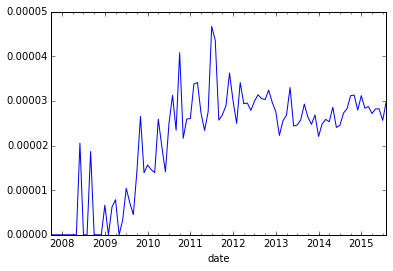

In [120]:
reddit.multicultural.plot(logy=False)

In [125]:
def plot(words):
    #markers = itertools.cycle(['s', 'D', '*', 'p', 'h', 'o', '+', 'd'])
    line_types = itertools.cycle(['-', '--', '-.'])
    df = reddit[words]
    #df.rolling(center=True,window=10).mean()
    #df = pd.rolling_mean(df, 7)
    plt.figure(figsize=(16,6))

    for i,word in enumerate(words):
        plt.plot(df.index, df[word], next(line_types), linewidth=3,
                 color=str(i/float(len(words))))
    axis_1 = plt.gca()

    axis_1.set_yscale('log') # You can disable
    axis_1.set_ylim(ymin=1e-7, ymax=1e-3) # You can disable
    axis_1.set_xlim(xmin=df.index[14])
    axis_1.yaxis.set_major_formatter(LogFormatterMathtext())  # You can disable
    #axis_1.grid(True)

    font = {'family': "Times New Roman",
            'color': 'black',
           'size': 20}
    axis_1.set_ylabel("Percentage of N-Grams (%)", font)
    axis_1.set_xlabel("Year", font)
    #axis_1.yaxis.set_major_formatter(FixedOrderFormatter(-3)) # You can enable
    axis_1.tick_params(axis='x', labelsize=15)
    axis_1.tick_params(axis='y', labelsize=15)
    for tick in axis_1.get_xticklabels():
        tick.set_fontname("Times New Roman")
    for tick in axis_1.get_yticklabels():
        tick.set_fontname("Times New Roman")
    plt.legend(words, loc=2,ncol=7)
    savefig('Reddit1.png')

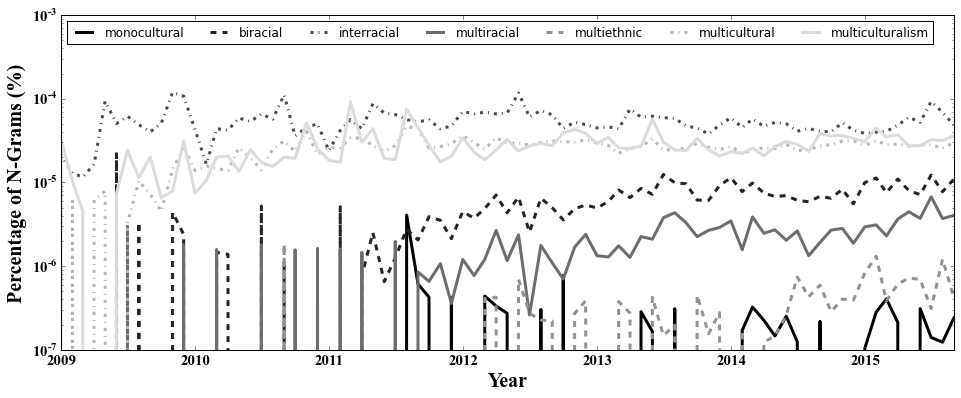

In [126]:
plot(["monocultural", "biracial", "interracial", "multiracial", "multiethnic", 
      "multicultural", "multiculturalism"])

In [56]:
print(reddit.index[14])

2008-12-31 00:00:00
